In [1]:
import geopandas as gpd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import sys

In [4]:
sys.path.append('..')

In [5]:
from nbhd import data

Initializing database connection...
Database connected!


In [6]:
db = data.Base()

In [7]:
from nbhd import geography

In [8]:
from shapely.geometry import Point

In [9]:
getcommunities = geography.Neighbourhood.get_communities

In [10]:
n = Point(338150, 392258)
circle = n.buffer(200)
circle.db = db
circle.geom = circle
getcommunities(circle, node_distance=10)
n = circle
n.bry = gpd.GeoSeries(n.boundary)
bdg_df = n.df[~n.df[['id_building']].duplicated()][['community', 'geometry_building']]

In [11]:
street_df = n.df[~n.df[['id_street']].duplicated()][['community', 'geometry_street', 'roadFunction']]

In [12]:
street_gdf = gpd.GeoDataFrame(street_df[['community', 'roadFunction']], 
                 geometry=gpd.GeoSeries(street_df.geometry_street))

In [13]:
aroad = street_gdf.loc[street_gdf.roadFunction=='A Road'].copy()

In [14]:
df = db.contains('slimroads', circle)

In [15]:
nodes = db.contains('roadnodes', circle)

In [16]:
shorts = df.loc[df.length<50].copy()

In [17]:
from random import randint

In [18]:
t = db.get_nearest_nodes_translator(circle, 50)

In [19]:
nearest_nodes = db.nearest_same('roadnodes', circle.wkt, 50)

In [20]:
nearest_nodes.sort_values('dist')

,id_1,id_2,dist
102,id75224BB9-006A-4854-881A-AA3C3832DD81,idFC22653F-F97F-46D1-A88C-A3F8388D569D,1.738189
98,idFC22653F-F97F-46D1-A88C-A3F8388D569D,id75224BB9-006A-4854-881A-AA3C3832DD81,1.738189
88,id2BE46803-BB77-46D2-B298-9A5C94768D3B,id72876A6C-FE8A-4AE6-B8FF-D3681D2B32B5,6.571408
85,id72876A6C-FE8A-4AE6-B8FF-D3681D2B32B5,id2BE46803-BB77-46D2-B298-9A5C94768D3B,6.571408
89,idEC17A4CA-6C44-4D4B-B573-FFB58E056928,id72876A6C-FE8A-4AE6-B8FF-D3681D2B32B5,8.118085
...,...,...,...
61,idC138A3F7-1BD9-4D9D-ABCA-416F08A23662,id351FC01C-F0ED-4EB6-A0AC-B619DB84764D,49.491980
81,idFE949DB9-AFB6-4195-AC6D-5782C8071341,idF436F444-5206-4629-92CF-545D0EAECEE2,49.709106
57,idF436F444-5206-4629-92CF-545D0EAECEE2,idFE949DB9-AFB6-4195-AC6D-5782C8071341,49.709106
49,idF436F444-5206-4629-92CF-545D0EAECEE2,idF310C6B7-9ABA-4A31-B8FA-A3BFB7F234BD,49.850397


<AxesSubplot:>

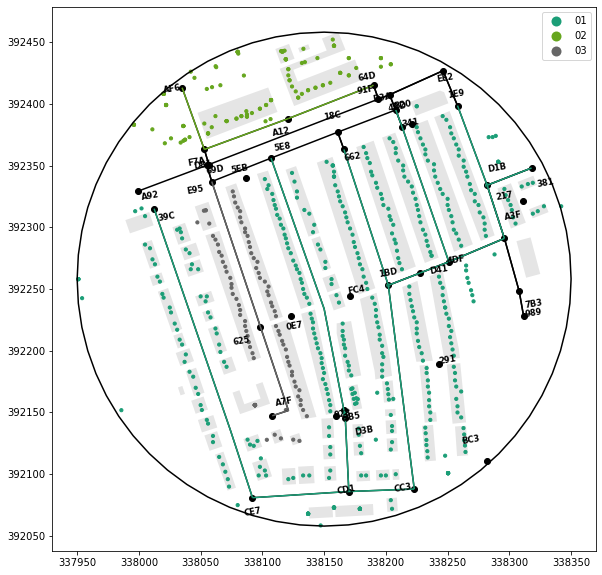

In [23]:
_fig, ax = plt.subplots(figsize=(10,10))
cmap = 'Dark2'
# cmap = 'tab20c'
# cmap = 'Set2'
# gpd.GeoDataFrame(n.df[['community']], 
#                  geometry=gpd.GeoSeries(n.df.geometry_street)).plot(
#     'community', ax=ax, linewidth=1, legend=True, cmap='gist_ncar')
df.plot(color='k', ax=ax, alpha=1)
shorts.plot(color='k', ax=ax)
nodes.plot(color='k', ax=ax)
street_gdf.plot('community', cmap=cmap, ax=ax, alpha=1)

gpd.GeoDataFrame(bdg_df[['community']], 
                 geometry=gpd.GeoSeries(bdg_df.geometry_building)).plot(
    color='k', ax=ax, markersize=1, alpha=0.1)
gpd.GeoDataFrame(n.df[['community']], 
                 geometry=gpd.GeoSeries.from_wkb(n.df.uprn_geometry)).plot(
    'community', ax=ax, markersize=10, cmap=cmap, alpha=1, legend=True)
for i in range(len(nodes)):
    name = nodes.iloc[i]
    ax.text(name.geometry.centroid.x -15 + randint(0,30), name.geometry.centroid.y-15 + randint(0,30), name.id[-3:],
            weight='bold', ha='center', rotation=10, size='small')
n.bry.plot(ax=ax, linewidth=1.5, color='k')
# plt.savefig()